# Introducing Keras 

[`keras`](https://keras.io/) is a library designed to simplify the access to deep learning functionality of TensorFlow (and Theano, but we will not touch on that at all).

We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from utils import generate_dataset

Numpy and Matplotlib are always good to have...

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

In [3]:
# Configuration variables:
num_labels = 2    # The number of labels.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
BATCH_SIZE = 100  # The number of training examples to use per training step.
n_train = 1000
n_test = 200

### The first example is a linearly separable data-set:

In [13]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, n_train=1000, n_test=200, num_labels=2,
                                                                    centers=2, center_box=[-4., 4.])

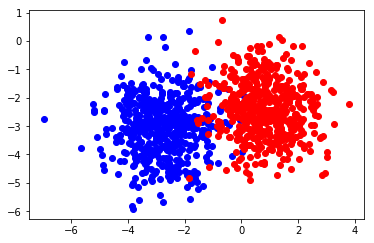

In [14]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [15]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [16]:
train_labels

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1,

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [18]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.fit(train_data, train_labels, epochs=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 243us/step - loss: 0.2586 - acc: 0.5580
Epoch 2/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.2500 - acc: 0.5620
Epoch 3/10
1000/1000 [==============================] - 0s 30us/step - loss: 0.2432 - acc: 0.5680
Epoch 4/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.2370 - acc: 0.5780
Epoch 5/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.2311 - acc: 0.5850
Epoch 6/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.2255 - acc: 0.5980
Epoch 7/10
1000/1000 [==============================] - 0s 28us/step - loss: 0.2202 - acc: 0.6090
Epoch 8/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.2151 - acc: 0.6160
Epoch 9/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.2102 - acc: 0.6320
Epoch 10/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.2057 - acc: 0.6480


In [21]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)

200/200 [==============================] - 0s 36us/step


In [22]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.20216717571
acc : 0.625


In [23]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls_np = np.zeros((cls_idx.shape[0], 2))
cls_np[np.arange(cls_np.shape[0]), cls_idx] = 1

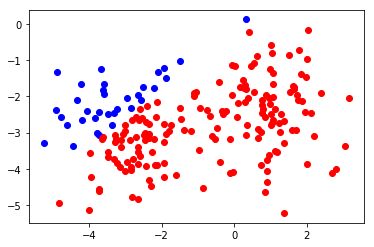

In [24]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls_np[:, 0]), 0], test_data[np.where(cls_np[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls_np[:, 1]), 0], test_data[np.where(cls_np[:, 1]), 1], 'ro')
ax.set_aspect('equal')

### The next set of data is not linearly separable:

In [25]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, 
                                                                    n_train=1000, 
                                                                    n_test=200,
                                                                    num_labels=2, 
                                                                    noise=0.2)

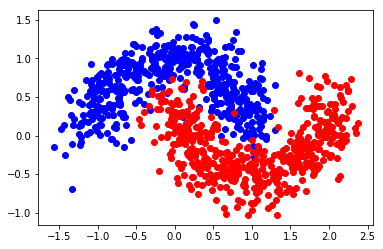

In [26]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [27]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [28]:
model.fit(train_data, train_labels, nb_epoch=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 21us/step - loss: 0.1763 - acc: 0.8340
Epoch 2/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.1745 - acc: 0.8380
Epoch 3/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.1727 - acc: 0.8370
Epoch 4/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.1709 - acc: 0.8350
Epoch 5/10
1000/1000 [==============================] - 0s 19us/step - loss: 0.1690 - acc: 0.8330
Epoch 6/10
1000/1000 [==============================] - 0s 27us/step - loss: 0.1671 - acc: 0.8380
Epoch 7/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.1652 - acc: 0.8360
Epoch 8/10
 100/1000 [==>...........................] - ETA: 0s - loss: 0.1600 - acc: 0.8300

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1000/1000 [==============================] - 0s 26us/step - loss: 0.1633 - acc: 0.8380
Epoch 9/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.1615 - acc: 0.8330
Epoch 10/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.1597 - acc: 0.8330


In [29]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 41us/step

loss : 0.165513448417
acc : 0.824999988079


In [30]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

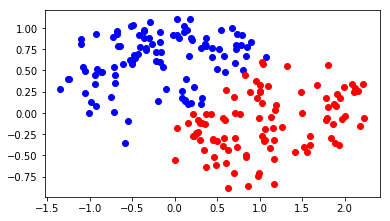

In [31]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [32]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

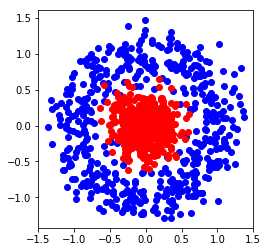

In [33]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [34]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [35]:
model.fit(train_data, train_labels, nb_epoch=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s 21us/step - loss: 0.2632 - acc: 0.4020
Epoch 2/5
1000/1000 [==============================] - 0s 23us/step - loss: 0.2626 - acc: 0.4080
Epoch 3/5
1000/1000 [==============================] - 0s 29us/step - loss: 0.2621 - acc: 0.4130
Epoch 4/5
1000/1000 [==============================] - 0s 23us/step - loss: 0.2615 - acc: 0.4210
Epoch 5/5
1000/1000 [==============================] - 0s 20us/step - loss: 0.2610 - acc: 0.4300


/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [36]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 52us/step

loss : 0.250956781209
acc : 0.405000001192


In [37]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

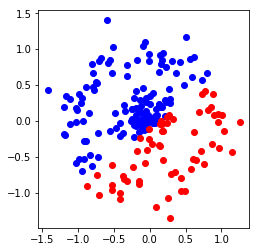

In [38]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [29]:
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Epoch 1/5
1000/1000 [==============================] - 1s 734us/step - loss: 0.6425 - acc: 0.5760
Epoch 2/5
1000/1000 [==============================] - 0s 29us/step - loss: 0.5967 - acc: 0.6670
Epoch 3/5
1000/1000 [==============================] - 0s 33us/step - loss: 0.5659 - acc: 0.7530
Epoch 4/5
1000/1000 [==============================] - 0s 34us/step - loss: 0.5309 - acc: 0.8060
Epoch 5/5
1000/1000 [==============================] - 0s 40us/step - loss: 0.5032 - acc: 0.8130

200/200 [==============================] - 0s 427us/step

loss : 0.442825749516
acc : 0.844999998808


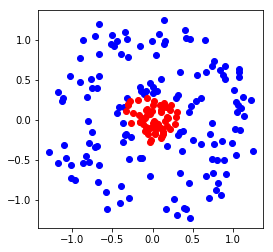

In [31]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [32]:
import keras 

In [33]:
keras.__version__

'2.1.2'